In [291]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.10.0
19.24.0


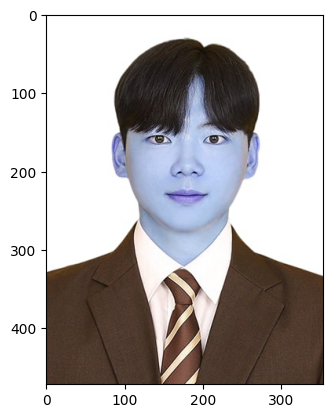

In [292]:
my_image_path ='images/jonghwan_img.png'
sticker_path ='images/cat-whiskers.png'

img_bgr=cv2.imread(my_image_path)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

rectangles[[(98, 116) (253, 270)]]


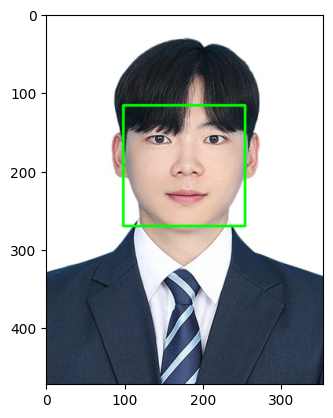

In [293]:
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_bgr,1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()

In [294]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_bgr, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


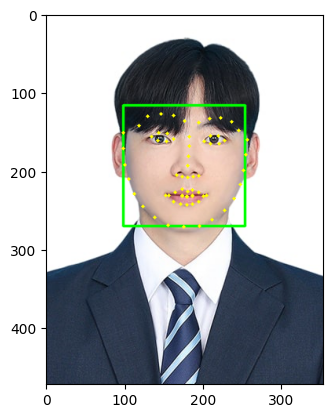

In [295]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr, point, 2, (0, 255, 255), -1)
        
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()

In [296]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(180, 193)
(x,y) : (180,193)
(w,h) : (156,156)


(156, 156, 4)


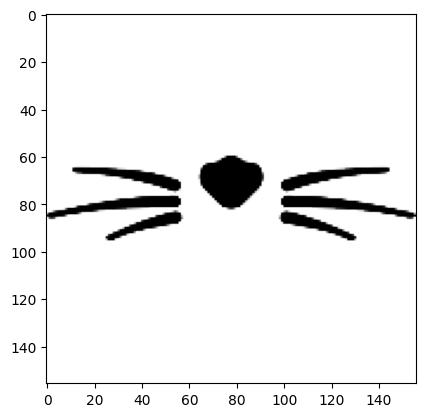

In [297]:
# 스티커 이미지 불러오기 (알파 채널 포함)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
# 스티커 크기 조정
img_sticker = cv2.resize(img_sticker, (w, h))  # 스티커 크기 조정
print(img_sticker.shape)

# BGRA를 RGBA로 변환하여 출력
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA))
plt.show()

In [298]:
refined_x = x - w//2
refined_y = y - h//2
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (102,115)


In [299]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

# 스티커를 적용할 영역 추출
sticker_area = img[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 알파 채널 분리
# 스티커의 알파 채널 (투명도)
alpha_s = img_sticker[:, :, 3] / 255.0 
# 배경의 투명도
alpha_l = 1.0 - alpha_s 

# 스티커를 적용 (알파 채널을 고려한 합성)
for c in range(0, 3):
    sticker_area[:, :, c] = (alpha_s * img_sticker[:, :, c] + alpha_l * sticker_area[:, :, c])

(x,y) : (102,115)


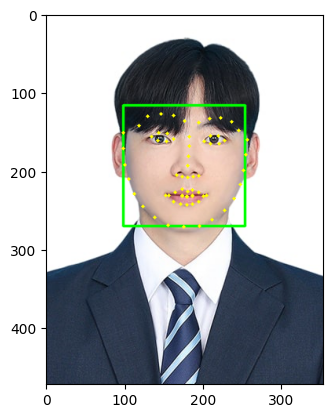

In [300]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area


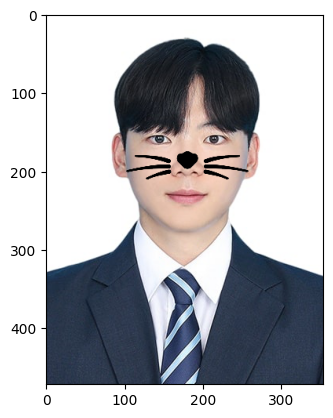

In [301]:
img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

## cv2.addWeighted() mthod를 적용한 반투명 스티커로 자연스럽게 만들기

In [350]:
# 원본 이미지 불러오기
my_image_path ='images/jonghwan_img.png'
sticker_path ='images/cat-whiskers.png'

img_bgr=cv2.imread(my_image_path)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = img_bgr.copy()

rectangles[[(98, 116) (253, 270)]]


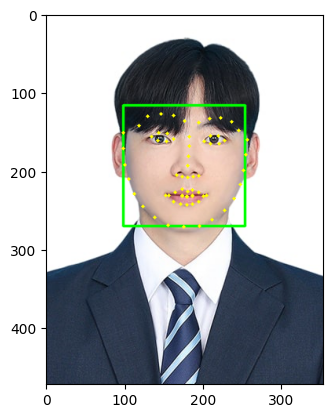

(180, 193)


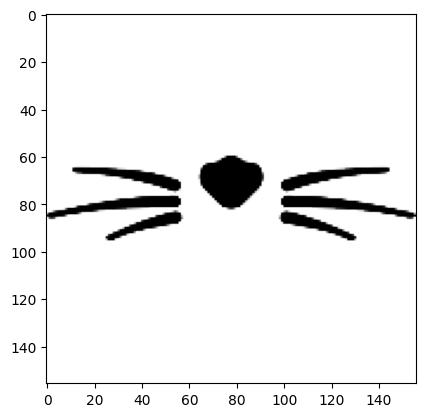

In [351]:
# detector를 선언합니다 - dlib hog detector 선언 => 얼굴 감지기
# 얼굴의 bounding box 추론
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_bgr,1)

# 찾은 얼굴 영역 박스 리스트 ()
print(dlib_rects)

# 찾은 얼굴 영역의 좌표 저장
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# Dlib landmark localization 적용 -  ibug 300w 데이터셋은 68개를 사용
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 인식, face landmark 좌표를 리스트로 저장
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_bgr, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

# list_landmarks의 원소만큼 반복문 실행하여 라벨링
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr, point, 2, (0, 255, 255), -1)

# 라벨링한 지점 표시하여 출력
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코의 index는 30 - default
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    
# 스티커 이미지 불러오기 (알파 채널 포함)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
# 스티커 크기 조정
img_sticker = cv2.resize(img_sticker, (w, h)) 

# BGRA를 RGBA로 변환하여 출력
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA))

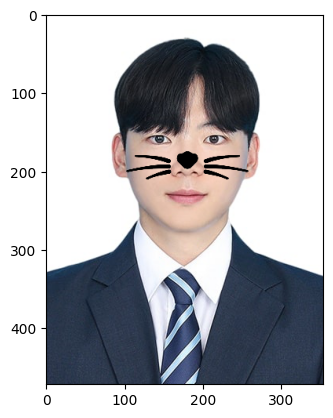

In [352]:
# 스티커의 알파 채널 추출
sticker_rgb = img_sticker[:, :, :3]  # RGB 채널
sticker_alpha = img_sticker[:, :, 3] / 255.0  # 알파 채널 (투명도)

# 코 인덱스 30의 좌표와 bounding box 좌표 고려한 스터커 합성 좌표 계산
refined_x = x - w//2
refined_y = y - h//2

# 이미지를 씌우기 위해 수염 이미지가 시작할 x좌표 값 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
    
# 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0


# 스티커를 적용할 영역 추출
sticker_area = img[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 알파 채널 분리
# 스티커의 알파 채널 (투명도)
alpha_s = img_sticker[:, :, 3] / 255.0 

# 배경의 투명도 변수 저장
alpha_l = 1 - alpha_s 

# 스티커를 적용 (알파 채널을 고려한 합성)
for c in range(0, 3):
    sticker_area[:, :, c] = (alpha_s * img_sticker[:, :, c] + alpha_l * sticker_area[:, :, c])


weight = 0.5  # 스티커의 가중치 (반투명도)

# sticker_area는 스티커가 적용된 영역, sticker_rgb는 스티커의 RGB 값
sticker_area_blended = cv2.addWeighted(sticker_area, weight, sticker_area, weight, 0)

# 라벨링 적용된 이미지에 스티커 크기 고려하여 합성
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area_blended

# 합성한 이미지 기존 이미지에 저장
img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area_blended

# 결과 표시
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# cv2.addWeighted() Method를 적용해 반투명도 설정을 진행중하였으나 적용이 되지 않는다.
##  -> 추가적으로 오류 개선 후 진행 예정

## 이미지 회전시켜 스티커 적용하기(45도)

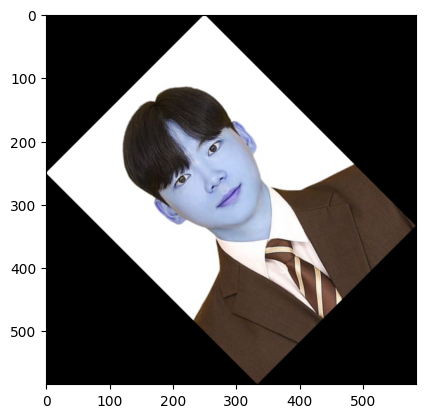

In [365]:
# 원본 이미지 불러오기
my_image_path ='images/jonghwan_img.png'
sticker_path ='images/cat-whiskers.png'

img_bgr=cv2.imread(my_image_path)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

img=img_bgr.copy()

# 이미지의 중심 좌표 구하기
(h, w) = img.shape[:2]
center = (w // 2, h // 2)

# 45도 회전 변환 행렬 계산 (1.0은 이미지 스케일을 의미, 그대로 유지)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

# 회전된 이미지 크기 구하기
cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])

# 새로운 이미지 크기 계산 (회전 후 이미지를 담기 위한 크기)
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

# 회전 변환 행렬에서 이동 값을 추가하여 새로운 크기에 맞게 중앙 정렬
rotation_matrix[0, 2] += (new_w / 2) - center[0]
rotation_matrix[1, 2] += (new_h / 2) - center[1]

# 이미지 회전
img_rotated = cv2.warpAffine(img, rotation_matrix, (new_w, new_h))

# 결과 이미지 출력
plt.imshow(img_rotated)
plt.show()

rectangles[[(184, 184) (339, 339)]]


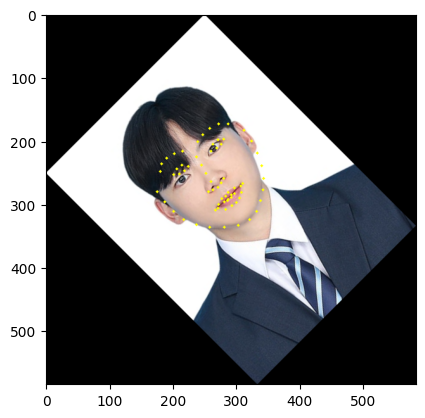

(260, 264)


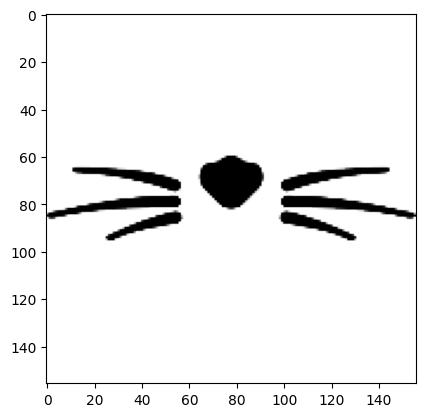

In [366]:
img=img_rotated.copy()

# detector를 선언합니다 - dlib hog detector 선언 => 얼굴 감지기
# 얼굴의 bounding box 추론
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rotated,1)

# 찾은 얼굴 영역 박스 리스트 ()
print(dlib_rects)

# 찾은 얼굴 영역의 좌표 저장
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# Dlib landmark localization 적용 -  ibug 300w 데이터셋은 68개를 사용
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 인식, face landmark 좌표를 리스트로 저장
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rotated, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

# list_landmarks의 원소만큼 반복문 실행하여 라벨링
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rotated, point, 2, (0, 255, 255), -1)

# 라벨링한 지점 표시하여 출력
plt.imshow(cv2.cvtColor(img_rotated,cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코의 index는 30 - default
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    
# 스티커 이미지 불러오기 (알파 채널 포함)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
# 스티커 크기 조정
img_sticker = cv2.resize(img_sticker, (w, h)) 

# BGRA를 RGBA로 변환하여 출력
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA))

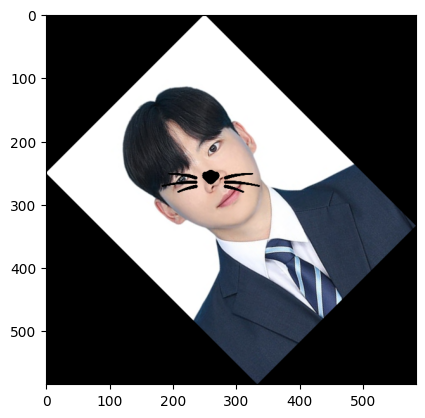

In [368]:
# 코 인덱스 30의 좌표와 bounding box 좌표 고려한 스터커 합성 좌표 계산
refined_x = x - w//2
refined_y = y - h//2

# 이미지를 씌우기 위해 수염 이미지가 시작할 x좌표 값 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
    
# 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0


# 스티커를 적용할 영역 추출
sticker_area = img[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 알파 채널 분리
# 스티커의 알파 채널 (투명도)
alpha_s = img_sticker[:, :, 3] / 255.0 

# 배경의 투명도 변수 저장
alpha_l = 1.0 - alpha_s 

# 스티커를 적용 (알파 채널을 고려한 합성)
for c in range(0, 3):
    sticker_area[:, :, c] = (alpha_s * img_sticker[:, :, c] + alpha_l * sticker_area[:, :, c])

# 라벨링 적용된 이미지에 스티커 크기 고려하여 합성
img_rotated[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

# 합성한 이미지 기존 이미지에 저장
img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area

# 결과 표시
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

## 결과를 보니 스티커의 회전도 필요하다고 생각된다.
## shape_predictor_68_face_landmarks는 정면방향의 사진과 얼굴의 방향이 정확해야 된다는 것을 확인하였다.
## 데이터셋 자체가 이러한 경우의 사진만 디텍션을 수행하였기 때문이라고 생각된다.
## 45도 회전 결과 정확한 바운딩 박스가 보이지는 않으나 랜드마크에 따라 스티커 합성은 가능하다. -> 실험 종료

## 이미지 회전시켜 스티커 적용하기(90도)

In [369]:
# 원본 이미지 불러오기
my_image_path ='images/jonghwan_img.png'
sticker_path ='images/cat-whiskers.png'

img_bgr=cv2.imread(my_image_path)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

img=img_bgr.copy()

img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

rectangles[]


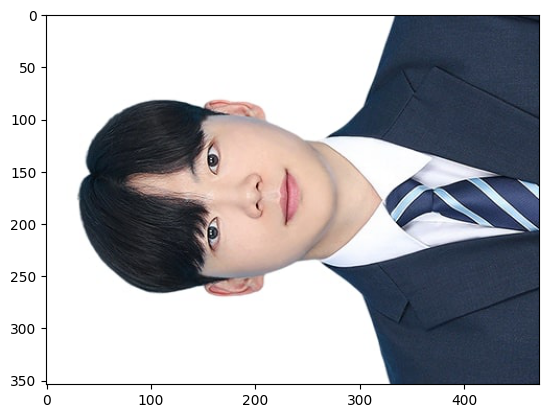

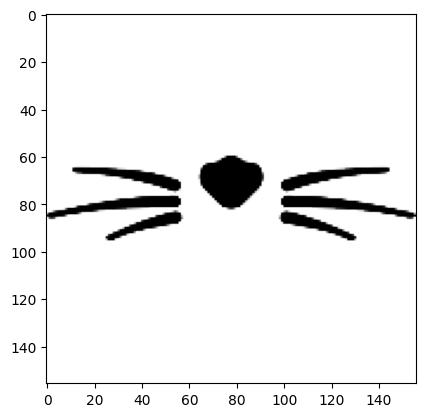

In [370]:
img=img_rotated.copy()

# detector를 선언합니다 - dlib hog detector 선언 => 얼굴 감지기
# 얼굴의 bounding box 추론
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rotated,1)

# 찾은 얼굴 영역 박스 리스트 ()
print(dlib_rects)

# 찾은 얼굴 영역의 좌표 저장
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# Dlib landmark localization 적용 -  ibug 300w 데이터셋은 68개를 사용
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 인식, face landmark 좌표를 리스트로 저장
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rotated, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

# list_landmarks의 원소만큼 반복문 실행하여 라벨링
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rotated, point, 2, (0, 255, 255), -1)

# 라벨링한 지점 표시하여 출력
plt.imshow(cv2.cvtColor(img_rotated,cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코의 index는 30 - default
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    
# 스티커 이미지 불러오기 (알파 채널 포함)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
# 스티커 크기 조정
img_sticker = cv2.resize(img_sticker, (w, h)) 

# BGRA를 RGBA로 변환하여 출력
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA))

## detection이 되지 않아 바운딩 박스와 랜드마크를 통한 라벨링이 원활히 진행되지 않는다. -> 실험 종료

## 사진 변경하여 기하학적 각도에 따른 결과 도출

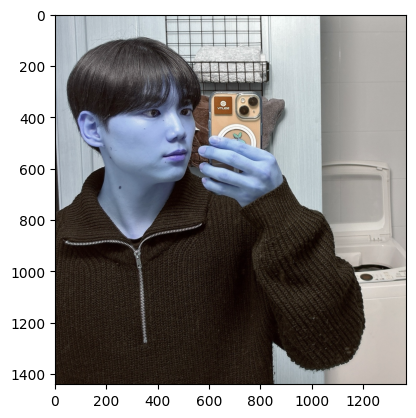

In [371]:
# 이미지를 특정 각도에서 촬영한 경우에 스티커 각도 설정 실험
# 각도가 정면이 아닌 이미지와 기존 수염 스티커 불러오기
my_image_path ='images/jonghwan_selfie.png'
sticker_path ='images/cat-whiskers.png'
# 이미지를 읽어오고 rgb변환과 원본 파일 copy
img_bgr=cv2.imread(my_image_path)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = img_bgr.copy()
# 이미지 시각화
plt.imshow(img_bgr)
plt.show()

rectangles[[(247, 247) (632, 632)]]


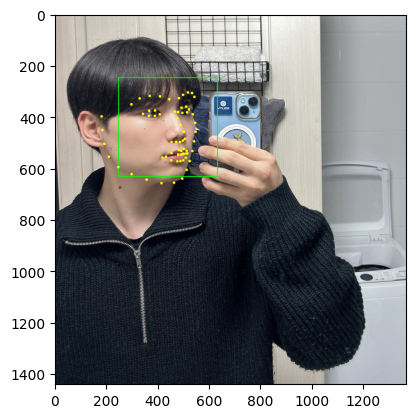

(501, 458)


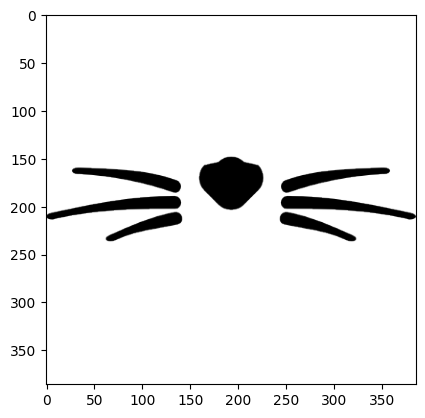

In [372]:
# detector를 선언합니다 - dlib hog detector 선언 => 얼굴 감지기
# 얼굴의 bounding box 추론
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_bgr,1)

# 찾은 얼굴 영역 박스 리스트 ()
print(dlib_rects)

# 찾은 얼굴 영역의 좌표 저장
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# Dlib landmark localization 적용 -  ibug 300w 데이터셋은 68개를 사용
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 인식, face landmark 좌표를 리스트로 저장
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_bgr, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

# list_landmarks의 원소만큼 반복문 실행하여 라벨링
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr, point, 5, (0, 255, 255), -1)

# 라벨링한 지점 표시하여 출력
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코의 index는 30 - default
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    
# 스티커 이미지 불러오기 (알파 채널 포함)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
# 스티커 크기 조정
img_sticker = cv2.resize(img_sticker, (w, h)) 

# BGRA를 RGBA로 변환하여 출력
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA))

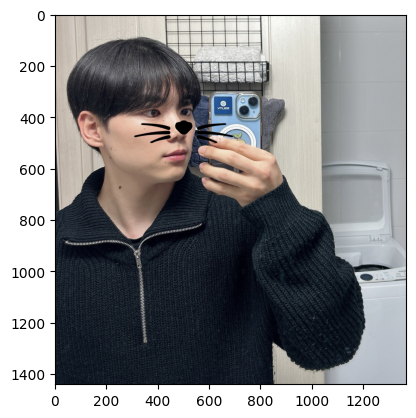

In [373]:
# 코 인덱스 30의 좌표와 bounding box 좌표 고려한 스터커 합성 좌표 계산
refined_x = x - w//2
refined_y = y - h//2

# 이미지를 씌우기 위해 수염 이미지가 시작할 x좌표 값 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
    
# 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0


# 스티커를 적용할 영역 추출
sticker_area = img[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 알파 채널 분리
# 스티커의 알파 채널 (투명도)
alpha_s = img_sticker[:, :, 3] / 255.0 

# 배경의 투명도 변수 저장
alpha_l = 1.0 - alpha_s 

# 스티커를 적용 (알파 채널을 고려한 합성)
for c in range(0, 3):
    sticker_area[:, :, c] = (alpha_s * img_sticker[:, :, c] + alpha_l * sticker_area[:, :, c])

# 라벨링 적용된 이미지에 스티커 크기 고려하여 합성
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

# 합성한 이미지 기존 이미지에 저장
img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area

# 결과 표시
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# 결과를 확인하면 셀피 이미지의 각도는 정면이 아니어도 스티커 사진은 당연하게도 정면각도로 나오게 된다.
# 스티커 사진을 기하학적 회전을 통해 각도를 조정하는 방법이 필요하다. 어떻게 해야 가능할까? 
# 실험 전 예상 방법 -> randmark를 하는 과정에서 각도에 대한 인수를 받아올 수 있을 것으로 판단한다.
# 즉, 이러한 인수를 어떠한 방법으로 받아오는지 리서치를 수행한다면 쉽게 스티커 조정이 가능할 것이라고 판단된다.

## 문제점 찾아보기

1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

randmark가 적용된 각도를 인수로 받는다면 그에 따른 스티커 각도도 같이 적용시켜줘야한다고 생각한다. 현재 이 방법에 대한 리서치를 진행중이다.

2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?

randmark 적용하는 shape_predictor_68_face_landmarks 모델과 관련이 깊다. 학습 데이터 셋에 이러한 경우가 고려가 되어있지 않고 이에따라 수행에 어려움을 겪는다고 판단된다.

3. 실행 속도가 중요할까요?

중요한 경우라고 생각된다. 최근 트랜드를 반영하면 스티커는 촬영 후 보다는 촬영 중 자신이 원하는 스티커가 얼굴인식과 함께 즉각 반영이 되도록 원한다고 판단된다. user journey, needs에 충족되는 실행 속도가 당연히 필요하다. 즉, 실시간 얼굴 인식, 각도에 따른 스티커 적용이 필요하므로 실행 속도가 중요하다.

4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

자신이 원하는 퀄리티에 비례한다고 생각된다. 트랜드가 비교적 지난 스티커 사진과 같은 경우에는 촬영 후 자신이 원하는 스티커를 붙여 합성한다. 이러한 경우에 편리함을 위해 빠른 적용이 가능하게끔만 원한다면 큰 정확도가 필요하지 않다. 그러나 즉각 반영 스티커 앱을 원하는 경우 촬영 시간 내 비교적 정확한 적용이 필요하다. 높은 퀄리티의 스티커 사용과 앱을 원한다면 당연히 높은 정확도가 나와야할 것이다. 자신이 만들고자 하는 앱의 수준에 따른 정확도 도출이 필요할 것이다. 